In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

## 2. Import the required libraries

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 3. Load Data

In [6]:
# Load data
train_data = pd.read_csv('data/myfile.csv')
# Separate features and target variable
#X_train = train_data.drop(['SalePrice'], axis=1)
y = train_data['y']

In [7]:
train_data

,G,x,y,x2,x3,x4
0,F,NaN,2.288124e+01,12642.172687,-37766.905141,85360.839008
1,F,2.0,2.000000e+09,7072.548920,-32221.859347,-16413.086122
2,F,3.0,2.924811e+01,4532.908981,30442.441823,47639.202544
3,F,4.0,3.212627e+01,13240.600347,-32496.923862,-47271.948807
4,F,5.0,3.444865e+01,8137.248343,-11834.562937,-97376.587454
...,...,...,...,...,...,...
1995,M,996.0,2.998083e+03,11051.635639,47019.829206,6238.707096
1996,M,997.0,3.000995e+03,-1152.332640,-22357.353789,22851.329598
1997,M,998.0,3.004020e+03,-1115.006412,-38096.648784,-55434.725806
1998,M,999.0,3.007099e+03,-8576.809778,-35320.710806,36364.273902


## 4. Exploratory Data Analysis / Analysis / Pre-Processing

**What are the Data Types of the Features ?**

In [8]:
print("What are the Data Types of the Features ?")
print(train_data.info())

What are the Data Types of the Features ?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       2000 non-null   object 
 1   x       1999 non-null   float64
 2   y       1999 non-null   float64
 3   x2      1999 non-null   float64
 4   x3      1999 non-null   float64
 5   x4      1999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 93.9+ KB
None


**Plots :**

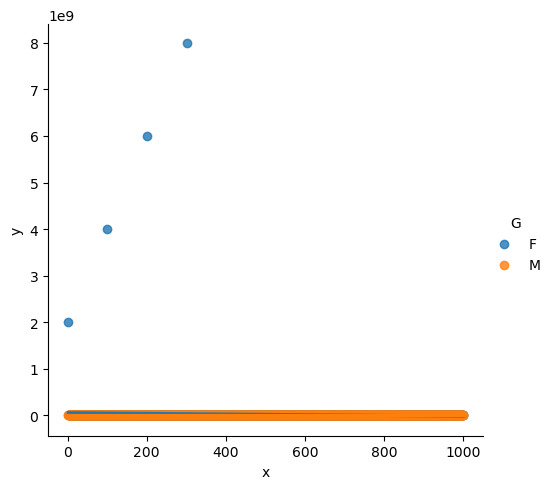

In [9]:
sns.lmplot(x='x', y="y", hue='G', data=train_data)

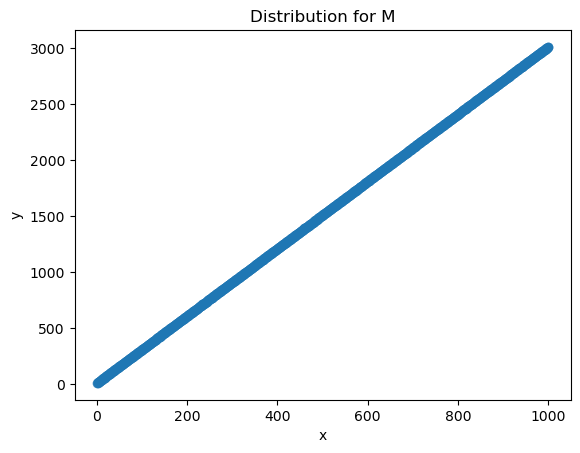

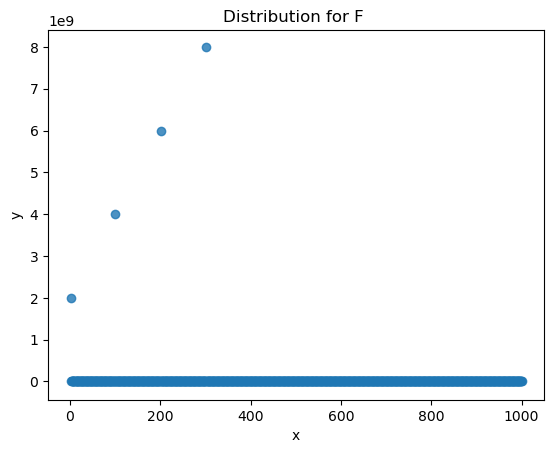

In [10]:
X = train_data
X_m = X.loc[X['G']=="M"]
X_f = X.loc[X['G']=="F"]
sns.regplot(x=X_m['x'],y=X_m['y'])
plt.title("Distribution for M")
plt.show()
plt.title("Distribution for F ")
sns.regplot(x=X_f['x'],y=X_f['y'])
plt.show()

**Is there any missing values ?**

In [11]:
#check if null values is present in dataset or not.....
train_data.isnull().sum()

G     0
x     1
y     1
x2    1
x3    1
x4    1
dtype: int64

**Let's drop the missing values :**

In [12]:
train_data = train_data.dropna() 

In [13]:
#check if null values is present in dataset or not.....
train_data.isnull().sum()

G     0
x     0
y     0
x2    0
x3    0
x4    0
dtype: int64

**Is there Any Outliers in the `y` Target ?**

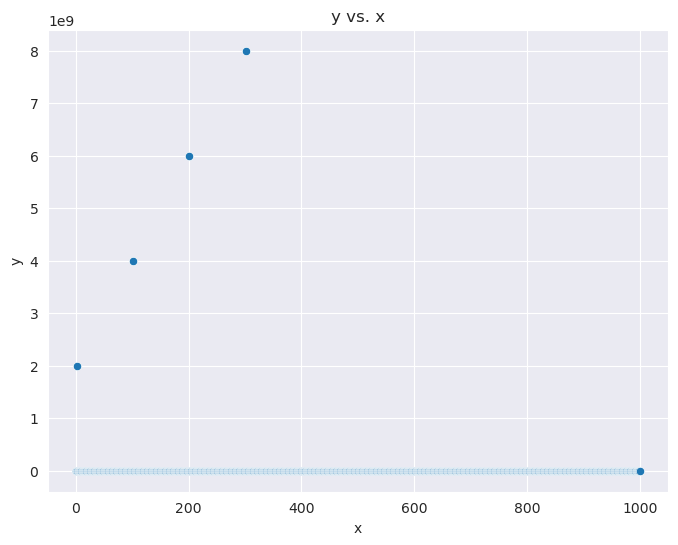

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=train_data)
title = plt.title('y vs. x')

**Drop the outliers :**

In [15]:
outlier_index = train_data[(train_data.x < 400)
                           & (train_data.y < 200 * 1000000000)].index
train_data.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

/tmp/ipykernel_78786/783578302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)


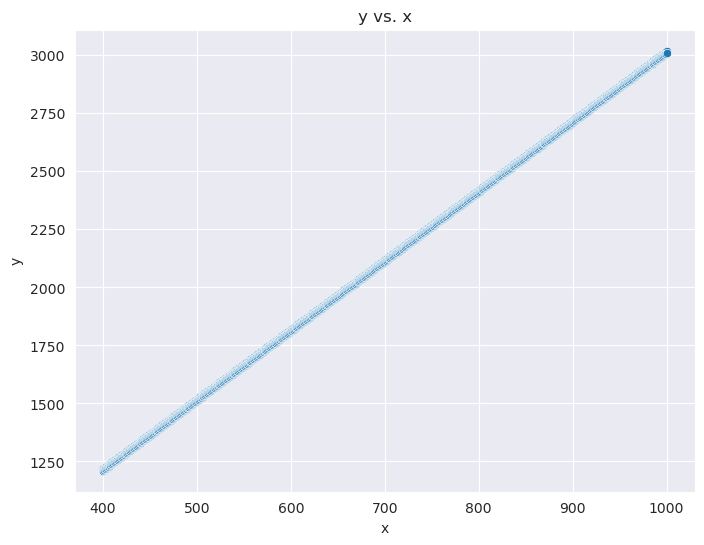

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=train_data)
title = plt.title('y vs. x')

In [18]:
train_data.isnull().sum()

G     0
x     0
y     0
x2    0
x3    0
x4    0
dtype: int64

**Display the top features most correlated with `y` :**

In [19]:
# Calculate the correlation of all features with 'y'
correlations = train_data.corr(numeric_only=True)['y'].sort_values(ascending=False)
# Display the top features most correlated with 'SalePrice'
top_correlations = correlations[1:11]
print(top_correlations)

x     0.999954
x3   -0.005517
x2   -0.007643
x4   -0.020537
Name: y, dtype: float64


**Scatter Plot :**

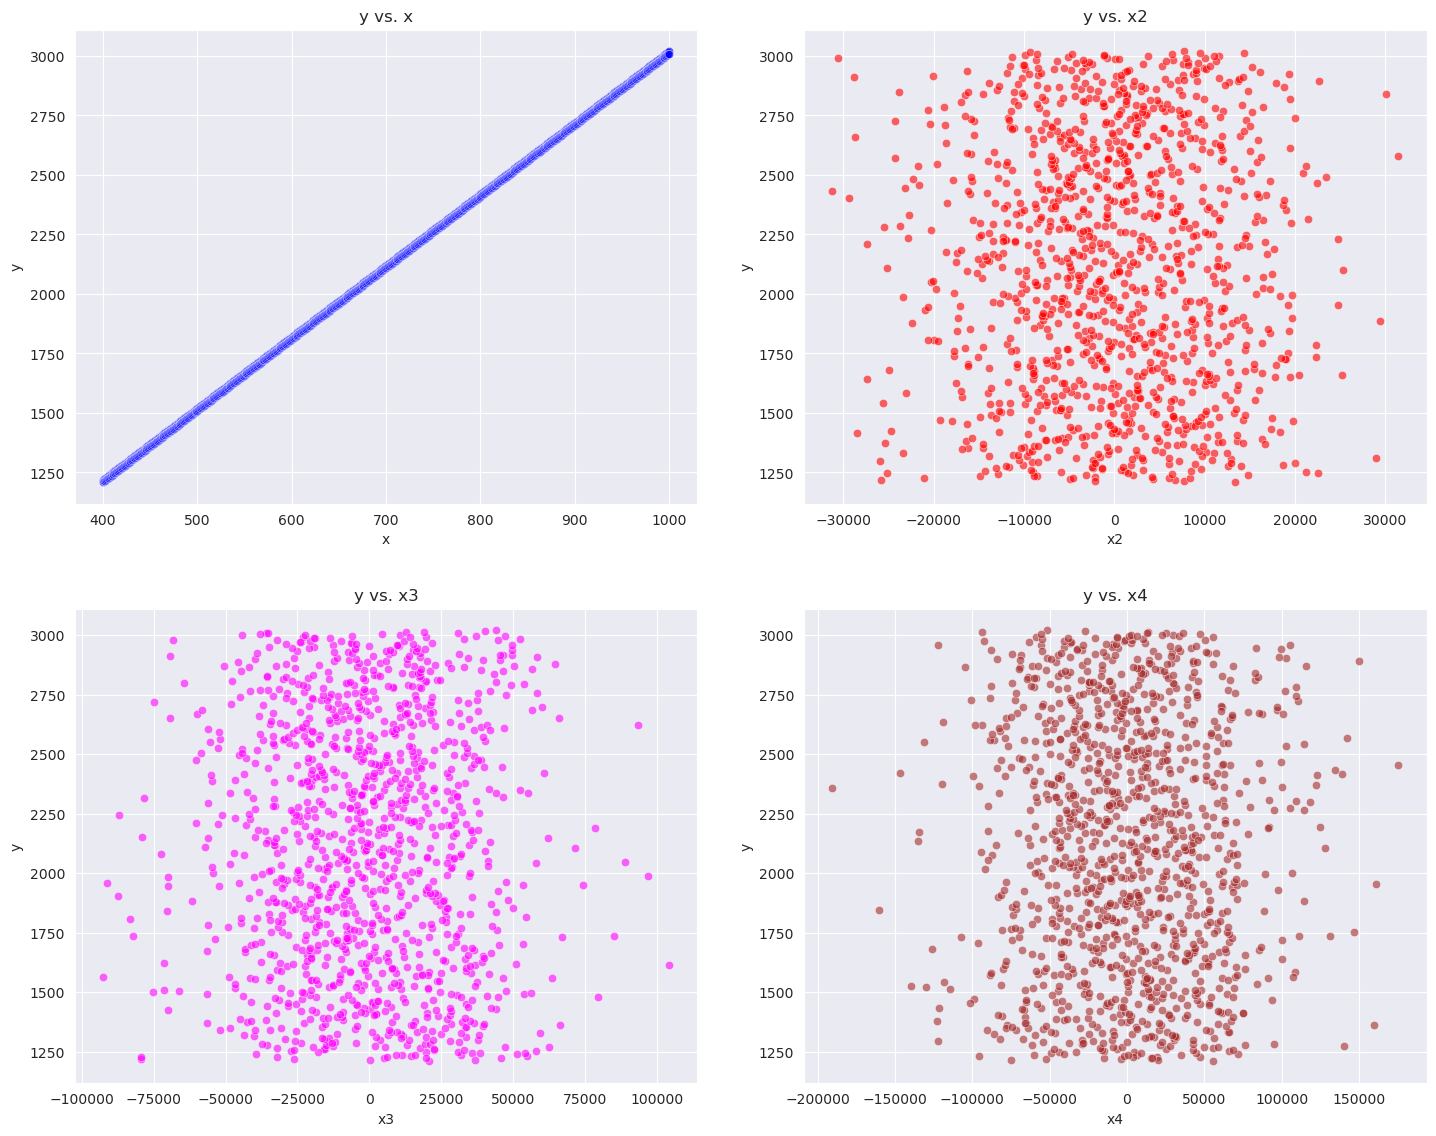

In [20]:
# Setting up the figure and axes
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plot for y vs. x
sns.scatterplot(x=train_data['x'], y=train_data['y'], ax=ax[0, 0], color='blue', alpha=0.6)
ax[0, 0].set_title('y vs. x')
ax[0, 0].set_ylabel('y')
ax[0, 0].set_xlabel('x')

# Scatter plot for y vs. x2
sns.scatterplot(x=train_data['x2'], y=train_data['y'], ax=ax[0, 1], color='red', alpha=0.6)
ax[0, 1].set_title('y vs. x2')
ax[0, 1].set_ylabel('y')
ax[0, 1].set_xlabel('x2')

# Scatter plot for y vs. x3
sns.scatterplot(x=train_data['x3'], y=train_data['y'], ax=ax[1, 0], color='magenta', alpha=0.6)
ax[1, 0].set_title('y vs. x3')
ax[1, 0].set_ylabel('y')
ax[1, 0].set_xlabel('x3')

# Scatter plot for y vs. x4
sns.scatterplot(x=train_data['x4'], y=train_data['y'], ax=ax[1, 1], color='brown', alpha=0.6)
ax[1, 1].set_title('y vs. x4')
ax[1, 1].set_ylabel('y')
ax[1, 1].set_xlabel('x4')


# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

**Plots - before training :**

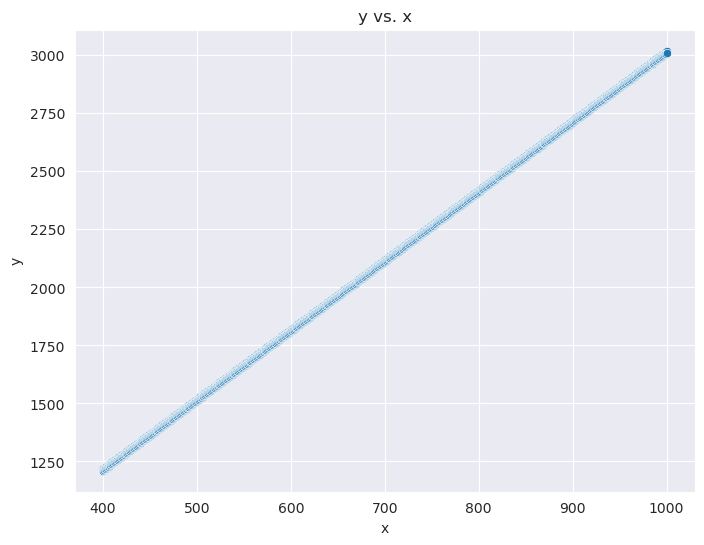

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=train_data)
title = plt.title('y vs. x')

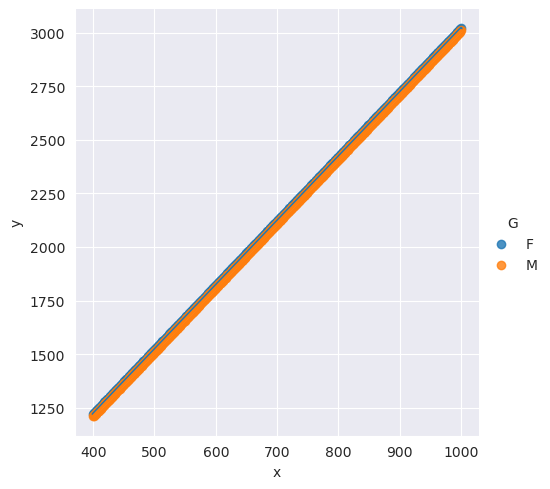

In [22]:
sns.lmplot(x='x', y="y", hue='G', data=train_data)

## 5. Feature Engineering

In [23]:
train_data.isnull().sum()

G     0
x     0
y     0
x2    0
x3    0
x4    0
dtype: int64

In [24]:
train_data_encoded = pd.get_dummies(train_data, columns=['G', ])
train_data_encoded

,x,y,x2,x3,x4,G_F,G_M
399,400.0,1220.253196,6710.023723,-79427.003082,-4021.199462,True,False
400,401.0,1223.000748,4304.634351,45768.892513,15361.328422,True,False
401,402.0,1226.373344,-21070.297460,-32163.825243,47041.438421,True,False
402,403.0,1228.472848,5994.735403,-79510.499359,19623.065340,True,False
403,404.0,1231.728254,-2143.978443,54671.669602,-2219.846433,True,False
...,...,...,...,...,...,...,...
1995,996.0,2998.083156,11051.635639,47019.829206,6238.707096,False,True
1996,997.0,3000.995219,-1152.332640,-22357.353789,22851.329598,False,True
1997,998.0,3004.019960,-1115.006412,-38096.648784,-55434.725806,False,True
1998,999.0,3007.099134,-8576.809778,-35320.710806,36364.273902,False,True


In [25]:
train_data_encoded

,x,y,x2,x3,x4,G_F,G_M
399,400.0,1220.253196,6710.023723,-79427.003082,-4021.199462,True,False
400,401.0,1223.000748,4304.634351,45768.892513,15361.328422,True,False
401,402.0,1226.373344,-21070.297460,-32163.825243,47041.438421,True,False
402,403.0,1228.472848,5994.735403,-79510.499359,19623.065340,True,False
403,404.0,1231.728254,-2143.978443,54671.669602,-2219.846433,True,False
...,...,...,...,...,...,...,...
1995,996.0,2998.083156,11051.635639,47019.829206,6238.707096,False,True
1996,997.0,3000.995219,-1152.332640,-22357.353789,22851.329598,False,True
1997,998.0,3004.019960,-1115.006412,-38096.648784,-55434.725806,False,True
1998,999.0,3007.099134,-8576.809778,-35320.710806,36364.273902,False,True


In [26]:
train_data_encoded.isnull().sum()

x      0
y      0
x2     0
x3     0
x4     0
G_F    0
G_M    0
dtype: int64

In [27]:
train_data_encoded.to_csv('./data/myfileCleaned.csv', sep=',', index=False, encoding='utf-8')